# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [1]:
import pandas as pd

cast=pd.read_csv("C:/Users/alexa/OneDrive/Documents/Babson/Advanced_Programming/Assignment 2/cast.csv")
dates=pd.read_csv("C:/Users/alexa/OneDrive/Documents/Babson/Advanced_Programming/Assignment 2/release_dates.csv")
titles=pd.read_csv("C:/Users/alexa/OneDrive/Documents/Babson/Advanced_Programming/Assignment 2/titles.csv")

In [2]:
# Information about the file cast.csv

print(cast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None


In [3]:
# Information about the file release_dates.csv

print(dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None


In [4]:
# Information about the file titles.csv

print(titles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None


### 2. How many movies have the title North by Northwest

In [6]:
nbn_movies = titles[titles['title'] == 'North by Northwest']

# Get the count of movies
count = len(nbn_movies)

print(f"Number of movies titled 'North by Northwest': {count}")

Number of movies titled 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [8]:
hamlet_versions = titles[titles['title'].str.contains(r'\bHamlet\b', case=False, na=False)]

count = len(hamlet_versions)

# Find the first and most current versions by sorting by year
first_hamlet = hamlet_versions.sort_values(by='year').iloc[0]
latest_hamlet = hamlet_versions.sort_values(by='year', ascending=False).iloc[0]

print(f"Number of versions of Hamlet: {count}")
print(f"The first version of Hamlet was made in {first_hamlet['year']}.")
print(f"The most recent version of Hamlet was made in {latest_hamlet['year']}.")

Number of versions of Hamlet: 54
The first version of Hamlet was made in 1910.
The most recent version of Hamlet was made in 2018.


### 4. List all the movies called Treasure Island from oldest to newest

In [10]:
ti_movies = titles[titles['title'] == 'Treasure Island']

# Sort by year from oldest to newest
sorted_ti = ti_movies.sort_values(by='year')

print(sorted_ti)

                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [14]:
movies_1950 = titles[titles['year'] == 1950]
movies_1980 = titles[titles['year'] == 1980]
movies_2000 = titles[titles['year'] == 2000]

count_1950 = len(movies_1950)
count_1980 = len(movies_1980)
count_2000 = len(movies_2000)

print(f"Number of movies made in 1950: {count_1950}")
print(f"Number of movies made in 1980: {count_1980}")
print(f"Number of movies made in 2000: {count_2000}")

Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


**From these 3 data points, we can say the total number of movies produced increases each year, and the rate of this growth also seems to accelerate over time.**

### 6. How big was the cast of Metropolis


In [16]:
m_cast = cast[cast['title'] == 'Metropolis']

cast_size = len(m_cast)

print(f"The cast size of Metropolis is: {cast_size}")

The cast size of Metropolis is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [21]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]
roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

count_roles_1950s = len(roles_1950s)
count_roles_1990s = len(roles_1990s)

print(f"Total number of roles for actors in the 1950s: {count_roles_1950s}")
print(f"Total number of roles for actors in the 1990s: {count_roles_1990s}")

Total number of roles for actors in the 1950s: 209890
Total number of roles for actors in the 1990s: 361218


### 8. How many roles for actors & actresses over time? Output should be a line graph

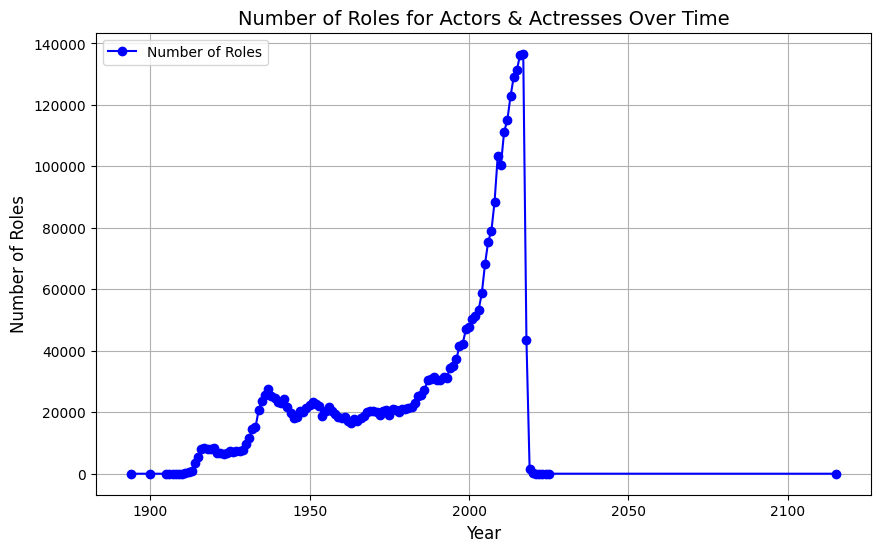

In [24]:
import matplotlib.pyplot as plt

roles_over_time = cast.groupby('year')['name'].count()

plt.figure(figsize=(10, 6))
plt.plot(roles_over_time.index, roles_over_time.values, label='Number of Roles', color='blue', marker='o')

plt.title('Number of Roles for Actors & Actresses Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Roles', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

#### Redoing the plot with 2017 as the final year to eliminate the incongruous data points.

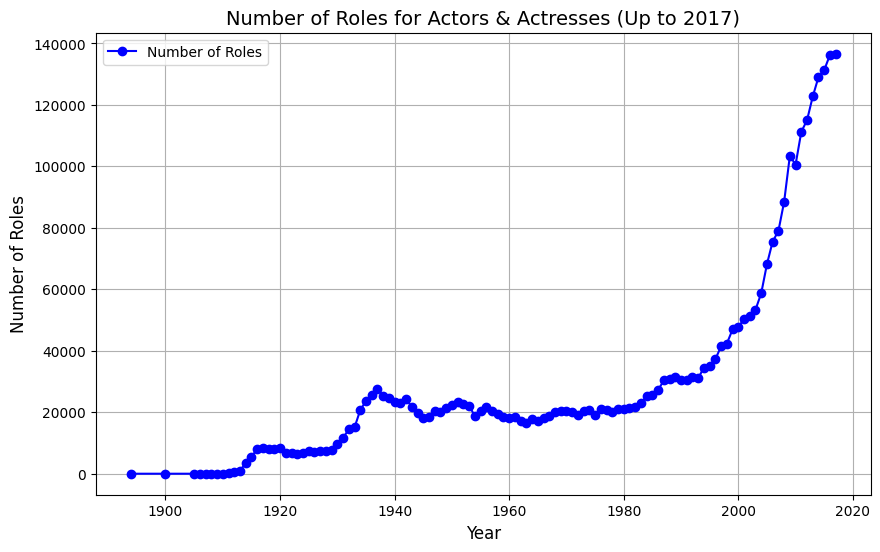

In [27]:
roles_until_2017 = cast[cast['year'] <= 2017]
roles_over_time = roles_until_2017.groupby('year')['name'].count()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(roles_over_time.index, roles_over_time.values, label='Number of Roles', color='blue', marker='o')

plt.title('Number of Roles for Actors & Actresses (Up to 2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Roles', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [28]:
roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009)]

leading_roles_2000s = roles_2000s[roles_2000s['n'] == 1]

count_leading_roles = len(leading_roles_2000s)

print(f"Number of leading roles in the 2000s: {count_leading_roles}")

Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [29]:
roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009)]
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

no_ranking_2000s = roles_2000s[roles_2000s['n'].isna()]
no_ranking_1950s = roles_1950s[roles_1950s['n'].isna()]

count_no_ranking_2000s = len(no_ranking_2000s)
count_no_ranking_1950s = len(no_ranking_1950s)

print(f"Number of roles with no ranking in the 2000s: {count_no_ranking_2000s}")
print(f"Number of roles with no ranking in the 1950s: {count_no_ranking_1950s}")

Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


**Between the 1950s and 2000s, the number of unranked roles increased significantly. Possible explanations for this growth include industry expansion, technological advancements, and the rise of platforms such as streaming services. Additionally, changing documentation practices may have altered the way roles are tracked and ranked.**

### 11. Plot the number of films made in each decade

C:\Users\alexa\AppData\Local\Temp\ipykernel_2588\1627588885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_until_2017['decade'] = (titles_until_2017['year'] // 10) * 10


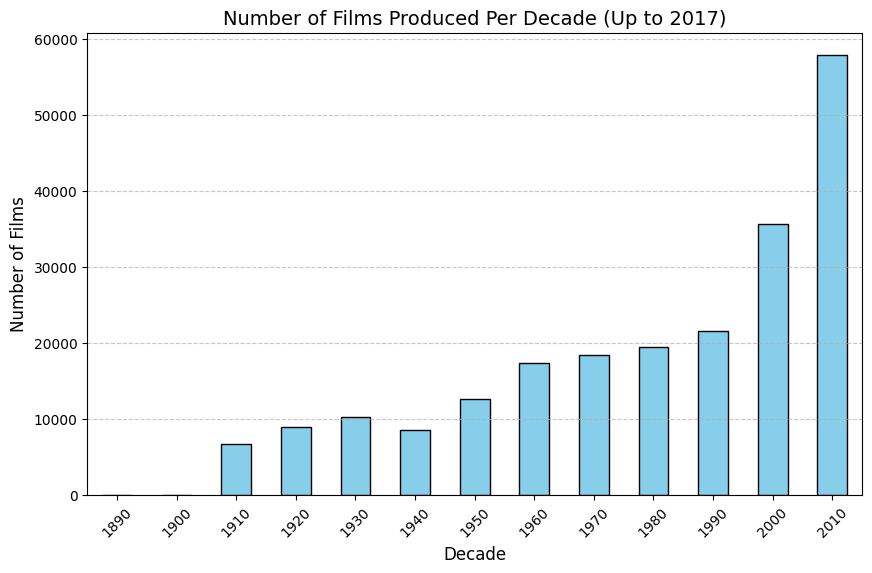

In [34]:
titles_until_2017 = titles[titles['year'] <= 2017]

titles_until_2017['decade'] = (titles_until_2017['year'] // 10) * 10

films_per_decade = titles_until_2017.groupby('decade')['title'].count()

plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Films Produced Per Decade (Up to 2017)', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()

#### Trying to fix the error

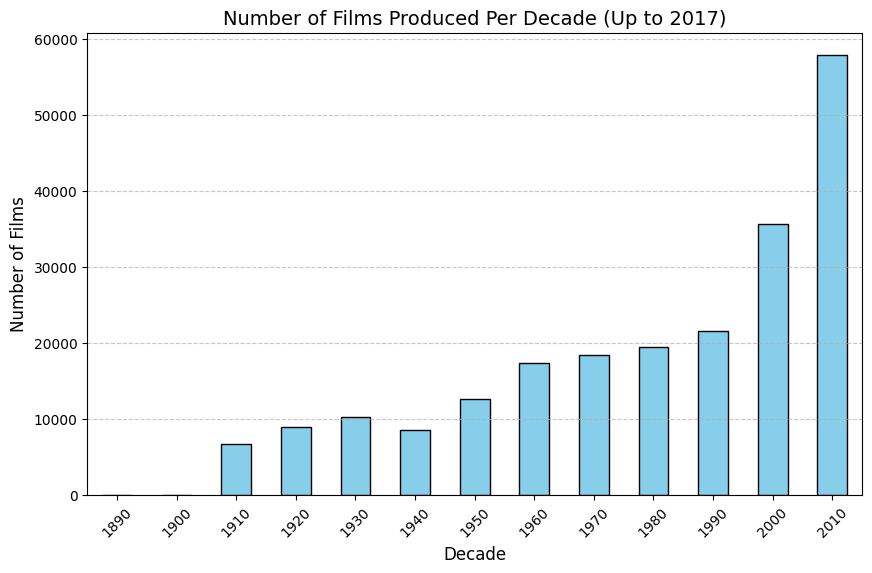

In [35]:
titles_until_2017 = titles[titles['year'] <= 2017]

titles_until_2017 = titles_until_2017.assign(decade=(titles_until_2017['year'] // 10) * 10)

films_per_decade = titles_until_2017.groupby('decade')['title'].count()

plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Films Produced Per Decade (Up to 2017)', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()

### 12. Plot the number of films with a Rustler character over time

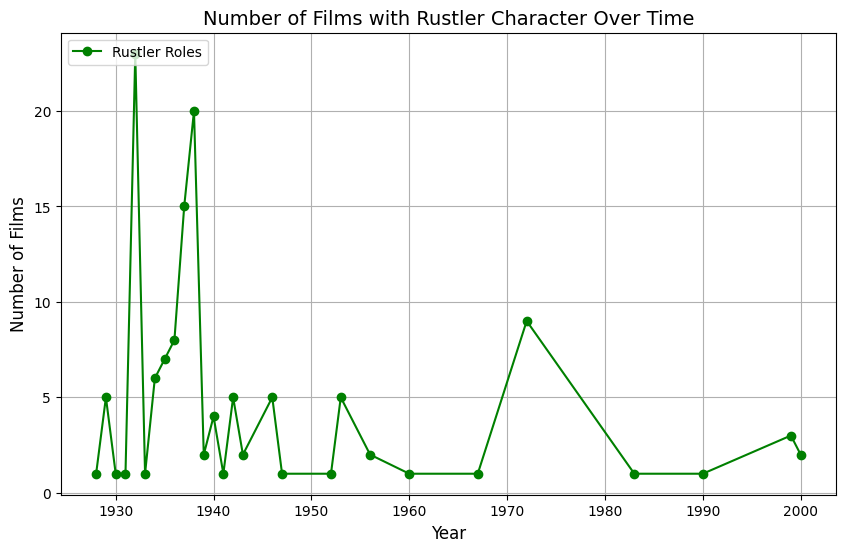

In [36]:
rustler_roles = cast[cast['character'] == 'Rustler']

rustler_per_year = rustler_roles.groupby('year')['title'].count()

plt.figure(figsize=(10, 6))
plt.plot(rustler_per_year.index, rustler_per_year.values, color='green', marker='o', label='Rustler Roles')

plt.title('Number of Films with Rustler Character Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

### 13. What are the top ten character names of all time?

In [37]:
top_characters = cast['character'].value_counts().head(10)

print("Top 10 Character Names of All Time:")
print(top_characters)

Top 10 Character Names of All Time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [38]:
films_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

actor_counts = films_1990s['name'].value_counts()

most_frequent_actor = actor_counts.idxmax()
most_frequent_actor_count = actor_counts.max()

print(f"The actor with the most film appearances in the 1990s is {most_frequent_actor} with {most_frequent_actor_count} films.")

The actor with the most film appearances in the 1990s is Shakti Kapoor with 143 films.


### 15. What are the top 10 roles that start with Science?

In [39]:
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 Roles Starting with 'Science':")
print(top_science_roles)

Top 10 Roles Starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


#### Changing everything to lower case

In [41]:
# Convert character names to lowercase
cast['character'] = cast['character'].str.lower()

science_roles = cast[cast['character'].str.startswith('science', na=False)]

top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 Roles Starting with 'Science':")
print(top_science_roles)

Top 10 Roles Starting with 'Science':
character
science teacher         60
science fair student     9
science student          6
science fair judge       6
science kid              5
science fair kid         5
science reporter         5
science                  4
science officer          3
science fair teacher     3
Name: count, dtype: int64


### 16. What film has the largest cast

In [42]:
largest_cast_film = cast.groupby('title')['name'].count().idxmax()
largest_cast_count = cast.groupby('title')['name'].count().max()

print(f"The film with the largest cast is '{largest_cast_film}' with {largest_cast_count} cast members.")

The film with the largest cast is 'Around the World in 80 Days' with 1364 cast members.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [43]:
# Group by title and count cast members for each film
cast_size = cast.groupby('title')['name'].count()

descriptive_stats = cast_size.describe()

print("Descriptive Statistics for Cast Size:")
print(descriptive_stats)

Descriptive Statistics for Cast Size:
count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: name, dtype: float64


**The data shows there is a huge range for cast size, from 1 to 1364. The average movie has a cast size of 20 with median size of 13.**

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [44]:
np_films = cast[cast['name'] == 'Natalie Portman']

films_per_year = np_films.groupby('year')['title'].count()

print("Number of films Natalie Portman has appeared in each year:")
print(films_per_year)

Number of films Natalie Portman has appeared in each year:
year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [45]:
np_top_roles = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]

top_roles_per_year = np_top_roles.groupby('year')['title'].count()

print("Number of films Natalie Portman appeared in as top star or co-star each year:")
print(top_roles_per_year)

Number of films Natalie Portman appeared in as top star or co-star each year:
year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

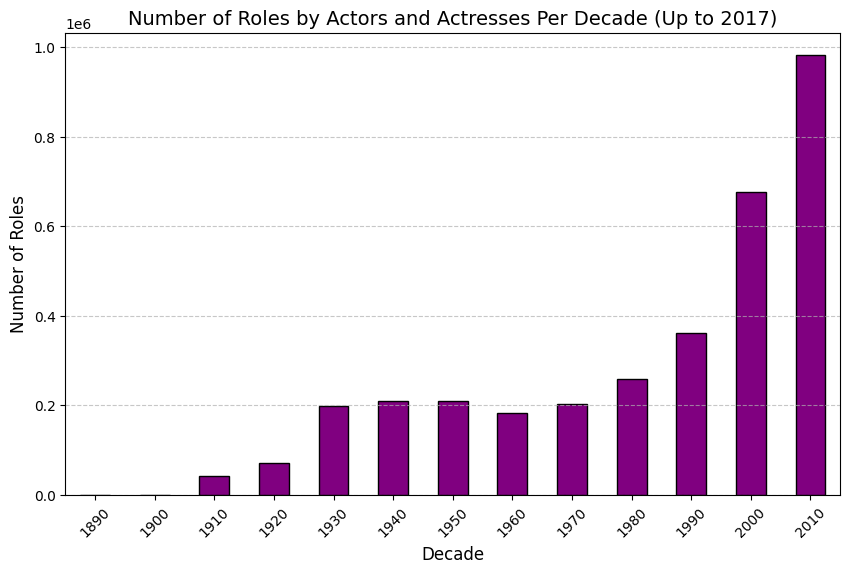

In [48]:
cast_until_2017 = cast[cast['year'] <= 2017]

cast_until_2017 = cast_until_2017.assign(decade=(cast_until_2017['year'] // 10) * 10)

roles_per_decade = cast_until_2017.groupby('decade')['name'].count()

plt.figure(figsize=(10, 6))
roles_per_decade.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Number of Roles by Actors and Actresses Per Decade (Up to 2017)', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Roles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

This took so many tries. I deleted the failures, but I wanted you to know I had so much trouble with this one. I don't know if I ended up getting what you wanted, but I got data, so yay!
The data shows Thursday and Friday are the most popular weekdays for releases, ensuring movies are in theaters for the weekend. The month data reveals that the spring and fall months are the most popular, with a significant dip in summer.

In [61]:
dates=pd.read_csv("C:/Users/alexa/OneDrive/Documents/Babson/Advanced_Programming/Assignment 2/release_dates.csv")
print(dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None


In [62]:
# Convert the 'date' column to datetime format
dates['date'] = pd.to_datetime(dates['date'], errors='coerce')

# Add a 'day' column to the DataFrame
dates['day'] = dates['date'].dt.day_name()

print(dates.head())

                    title  year      country       date        day
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15     Friday
1                   #BKKY  2016     Cambodia 2017-10-12   Thursday
2                 #Beings  2015      Romania 2015-01-29   Thursday
3               #Captured  2017          USA 2017-09-05    Tuesday
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21  Wednesday


In [63]:
# Add a 'month' column to the DataFrame
dates['month'] = dates['date'].dt.month_name()

print(dates.head())

                    title  year      country       date        day      month
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15     Friday       June
1                   #BKKY  2016     Cambodia 2017-10-12   Thursday    October
2                 #Beings  2015      Romania 2015-01-29   Thursday    January
3               #Captured  2017          USA 2017-09-05    Tuesday  September
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21  Wednesday    January


In [65]:
# Create a pivot table to analyze releases by day of the week
release_patterns_day = pd.pivot_table(
    dates,
    values='title',
    index='day',
    aggfunc='count',
    fill_value=0
)

# Create a pivot table to analyze releases by month
release_patterns_month = pd.pivot_table(
    dates,
    values='title',
    index='month',
    aggfunc='count',
    fill_value=0
)

print("Day of the Week Release Patterns:")
print(release_patterns_day)

print("\nMonth Release Patterns:")
print(release_patterns_month)

Day of the Week Release Patterns:
            title
day              
Friday     163174
Monday      37210
Saturday    31331
Sunday      15823
Thursday   125746
Tuesday     16762
Wednesday   53439

Month Release Patterns:
           title
month           
April      37674
August     35011
December   39096
February   36307
January    39412
July       31421
June       32704
March      40257
May        35449
November   38200
October    40204
September  37750


In [66]:
# Define the chronological order for days and months
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Sort the pivot table for days
release_patterns_day = release_patterns_day.reindex(day_order)

# Sort the pivot table for months
release_patterns_month = release_patterns_month.reindex(month_order)

# Display the sorted tables
print("Chronologically Sorted Day of the Week Release Patterns:")
print(release_patterns_day)

print("\nChronologically Sorted Month Release Patterns:")
print(release_patterns_month)

Chronologically Sorted Day of the Week Release Patterns:
            title
day              
Monday      37210
Tuesday     16762
Wednesday   53439
Thursday   125746
Friday     163174
Saturday    31331
Sunday      15823

Chronologically Sorted Month Release Patterns:
           title
month           
January    39412
February   36307
March      40257
April      37674
May        35449
June       32704
July       31421
August     35011
September  37750
October    40204
November   38200
December   39096


### Combined Table

In [73]:
# Create a pivot table that combines day of the week and month
combined_pivot_table = pd.pivot_table(
    dates,
    values='title',
    index='day',  
    columns='month',
    aggfunc='count',
    fill_value=0 
)

# Sort the rows and columns into chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

combined_pivot_table = combined_pivot_table.reindex(index=day_order, columns=month_order)

print("Combined Pivot Table (Day of the Week vs Month):")
print(combined_pivot_table)

Combined Pivot Table (Day of the Week vs Month):
month      January  February  March  April    May   June   July  August  \
day                                                                       
Monday        3699      3138   3383   3168   3050   2337   2267    2844   
Tuesday       1823      1190   1313   1446   1377   1179   1144    1121   
Wednesday     4663      4118   4479   4650   4289   4282   4243    4270   
Thursday     10746     10356  11844  10625  10100   9469   8947    9931   
Friday       13734     13833  15268  13559  13198  11997  11635   13430   
Saturday      2925      2395   2742   2868   2270   2409   2291    2277   
Sunday        1822      1277   1228   1358   1165   1031    894    1138   

month      September  October  November  December  
day                                                
Monday          3161     3551      3372      3240  
Tuesday         1309     1542      1415      1903  
Wednesday       4161     4605      4582      5097  
Thursday       

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

I was able to plot the tables and the data looks correct, but again I am not sure i made the table you were looking for.

<Figure size 1000x600 with 0 Axes>

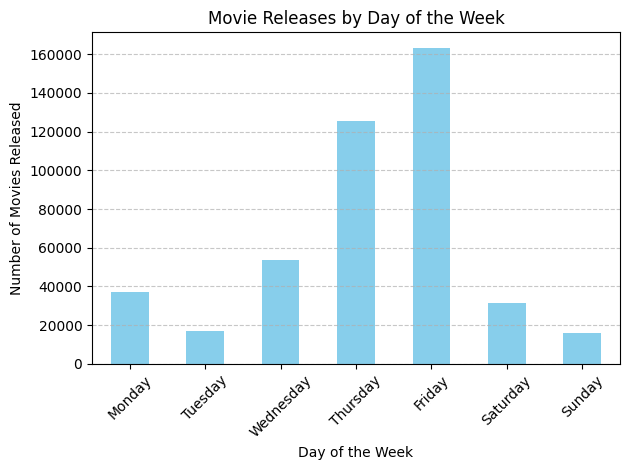

<Figure size 1200x600 with 0 Axes>

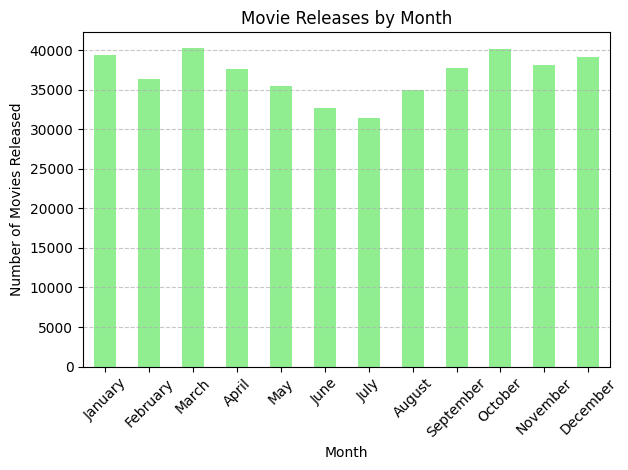

In [67]:
import matplotlib.pyplot as plt

# Plot for Day of the Week Release Patterns
plt.figure(figsize=(10, 6))
release_patterns_day.plot(kind='bar', legend=False, color='skyblue', rot=0)
plt.title('Movie Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Month Release Patterns
plt.figure(figsize=(12, 6))
release_patterns_month.plot(kind='bar', legend=False, color='lightgreen', rot=0)
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Combined plot

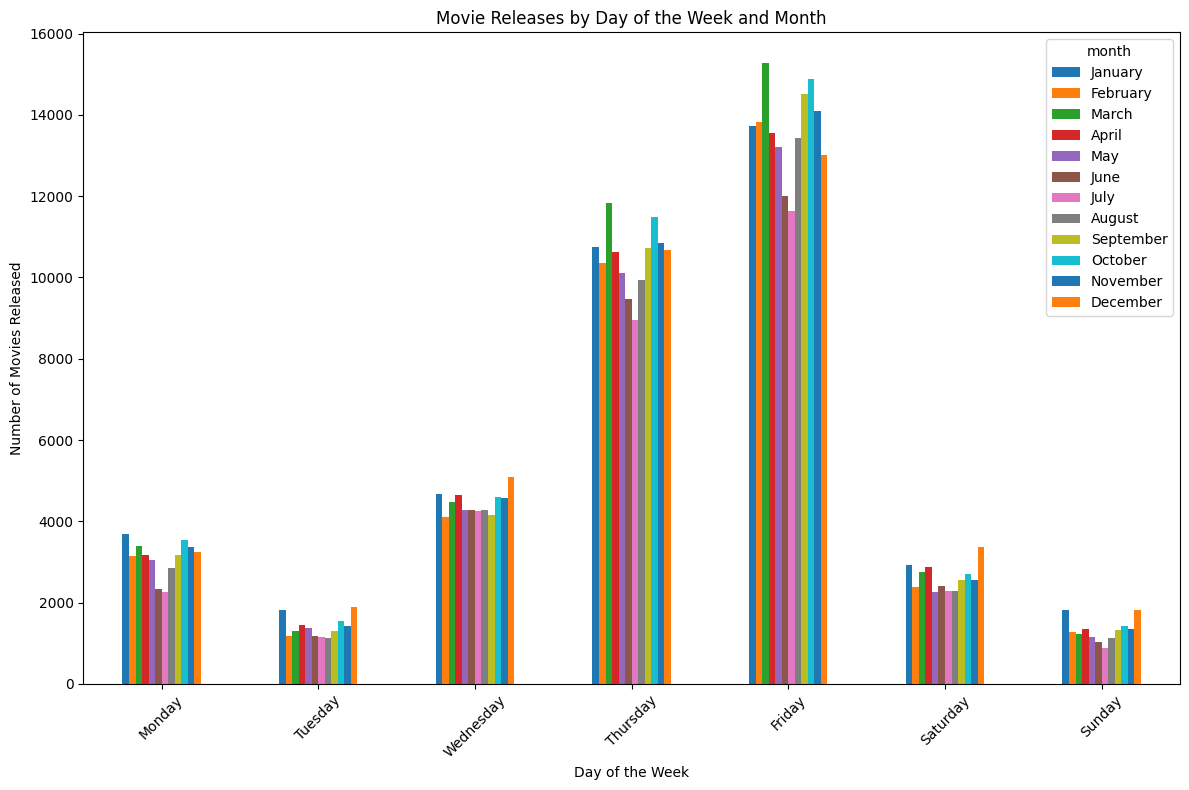

In [74]:
combined_pivot_table.plot(kind='bar', figsize=(12, 8))

plt.title('Movie Releases by Day of the Week and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies Released')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [71]:
# Filter for Star Wars movies
star_wars_cast = cast[cast['title'].str.contains('Star Wars', case=False, na=False)]

# Get unique actors from Star Wars movies
star_wars_actors = star_wars_cast['name'].unique()

# Filter the cast DataFrame for movies featuring these actors
other_movies_cast = cast[cast['name'].isin(star_wars_actors)]

# Exclude Star Wars movies from the results
other_movies_cast = other_movies_cast[~other_movies_cast['title'].str.contains('Star Wars', case=False, na=False)]

# Group by actor to list their other movies
actor_movies = other_movies_cast.groupby('name')['title'].unique().reset_index()

for index, row in actor_movies.iterrows():
    print(f"{row['name']} appeared in:")
    print(row['title'])
    print()

Aaron (IV) Kennedy appeared in:
['One Square Mile' 'Run All Night']

Adam Bareham appeared in:
['Wilt']

Adam Driver appeared in:
['Bluebird' 'Frances Ha' 'Gayby' 'Hungry Hearts' 'Inside Llewyn Davis'
 'J. Edgar' 'Lincoln' 'Logan Lucky' 'Midnight Special'
 'Not Waving But Drowning' 'Paterson' 'Silence' 'The F Word'
 'The Man Who Killed Don Quixote'
 'The Meyerowitz Stories (New and Selected)' 'This Is Where I Leave You'
 'Tough as They Come' 'Tracks' "While We're Young"]

Adrian Allan appeared in:
['Acquainted' 'Bridget Jones: The Edge of Reason' 'Furious 6'
 'Guardians of the Galaxy' 'Mamma Mia!']

Ahmed Best appeared in:
['FDR: American Badass!' 'Lean on Me' 'Mother and Child' 'Open Window'
 'Poolboy: Drowning Out the Fury' 'W.M.D.']

Aidan (II) Knight appeared in:
['Sex & Drugs & Rock & Roll' 'The Forbidden Note']

Ailsa Berk appeared in:
['Fierce Creatures' 'Greystoke: The Legend of Tarzan, Lord of the Apes'
 'Little Buddha' 'Max mon amour']

Al Lampert appeared in:
['Big Zapper' '